#Part 1: examine California housing data set



##1,2
###Open the 'cadata.txt' file with a text editor.  Read the description in the file to figure out sensible names for each column, and create a header line with those names (whitespace separated, like the data) immediately before the data.  Note on what line the header and data begin.
###import the modules you'll need to read CSV files and plot it.  Read in the cadata.txt file data CSV file to a pandas DataFrame.  As before, you'll need to tell the pandas.read_csv() function how many lines to skip, and to use whitespace for the separator. You may get errors about the encoding, in which case you can pass the encoding_errors="replace" argument to read_csv().


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_housing = pd.read_csv('/content/drive/MyDrive/machinelearning_dataset/cadata.txt', sep='\s+', skiprows=27, names=['MedianHouseValue', 'MedianIncome', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households', 'Latitude', 'Longitude'], encoding_errors="replace")
print(len(data_housing))
print(data_housing.columns)
print(data_housing.head())

20640
Index(['MedianHouseValue', 'MedianIncome', 'HousingMedianAge', 'TotalRooms',
       'TotalBedrooms', 'Population', 'Households', 'Latitude', 'Longitude'],
      dtype='object')
   MedianHouseValue  MedianIncome  HousingMedianAge  TotalRooms  \
0          452600.0        8.3252              41.0       880.0   
1          358500.0        8.3014              21.0      7099.0   
2          352100.0        7.2574              52.0      1467.0   
3          341300.0        5.6431              52.0      1274.0   
4          342200.0        3.8462              52.0      1627.0   

   TotalBedrooms  Population  Households  Latitude  Longitude  
0          129.0       322.0       126.0     37.88    -122.23  
1         1106.0      2401.0      1138.0     37.86    -122.22  
2          190.0       496.0       177.0     37.85    -122.24  
3          235.0       558.0       219.0     37.85    -122.25  
4          280.0       565.0       259.0     37.85    -122.25  


##3
###Plot a histogram of the median house value column.  Make sure that the number of bins and the range of the plot make it possible to see what's going on.  Create a text cell with your best guess as to the units of this column.  If the distribution doesn't look smooth, give one or more possible reasons.


range 14999.0 500001.0 mean 206855.81690891474 median 179700.0


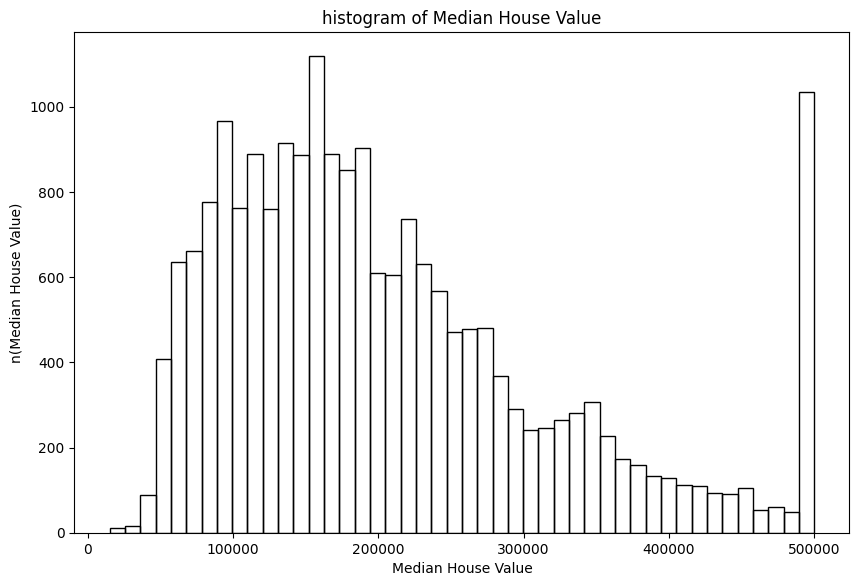

In [43]:
Median_House_Value = data_housing[data_housing.columns[0]]
#locate median house value

print('range', Median_House_Value.min(), Median_House_Value.max(), 'mean', Median_House_Value.mean(), 'median', Median_House_Value.median())
#list features of median house value

figsize = (10, 6.5)
fig, ax = plt.subplots(figsize=figsize)
ax.hist(Median_House_Value.values, bins='auto', fill=False)
ax.set_title('histogram of Median House Value')
ax.set_xlabel('Median House Value')
ax.set_ylabel('n(Median House Value)')
fig.show()

### I think the unit of x-axis is dollar (value) and of y-axis is number of houses that fall into this price range. From the graph, as we can see, the distribution is not normal and the majority falls into 500000 bracket. The reason why this distribution is not smooth is because most house value exceeded 500000 at that time, which was a normal price for buying a house. Houses with lower price were not common just like the real estate market right now.

##4
###Make a scatterplot of the number of bedrooms per household on the x axis and the median house value on the y.  In addition to a scatterplot with the default range, make another scatterplot that focuses on the x axis range that includes only the majority of the data, excluding any outliers. In a text cell discuss whether it appears that the house value depends on the number of bedrooms per household, and whether you think you understand what the "total number of bedrooms" feature means?  Do its values seem reasonable?


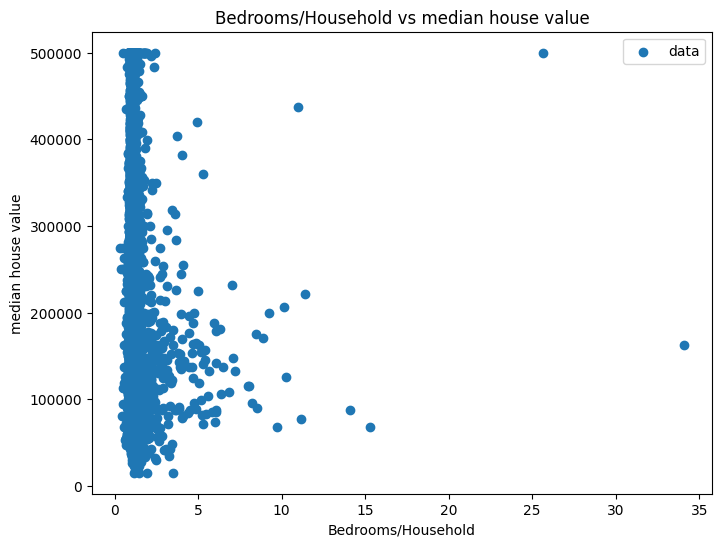

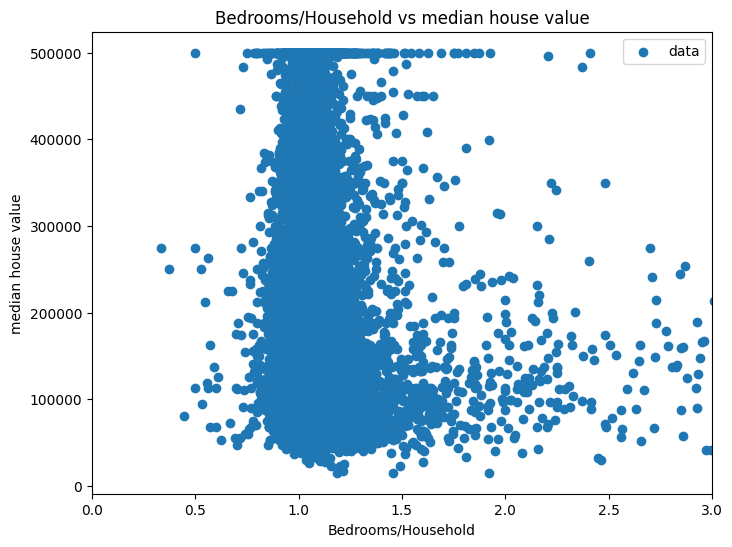

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data_housing['TotalBedrooms']/data_housing['Households'], data_housing['MedianHouseValue'], label='data')
ax.set_title('Bedrooms/Household vs median house value')
ax.set_xlabel('Bedrooms/Household')
ax.set_ylabel('median house value')
ax.legend()
fig.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data_housing['TotalBedrooms']/data_housing['Households'], data_housing['MedianHouseValue'], label='data')
ax.set_title('Bedrooms/Household vs median house value')
ax.set_xlabel('Bedrooms/Household')
ax.set_ylabel('median house value')
ax.set_xlim(0,3)
ax.legend()
fig.show()

### The number of bedrooms per household does not decide the value of the house. In the two graphs shown above, the most expensive houses only have 0-5 bedrooms. There is no correlation between the number of bedrooms and the price. The value does not look reasonable in the graphs. So I think the total number of bedrooms represents the number in a large residental place instead of in a private house. Otherwise it does not explain why a big house with 35 bedrooms only worth less than 200000.

##5
### Make 3 scatterplots with median house value on the y, and: one with the median income, one with the total rooms per household, and one with the latitude on the x.  In a text cell, say whether any show a significant looking pattern.


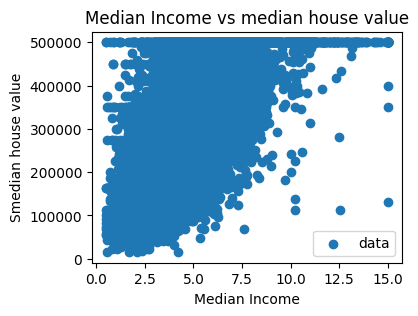

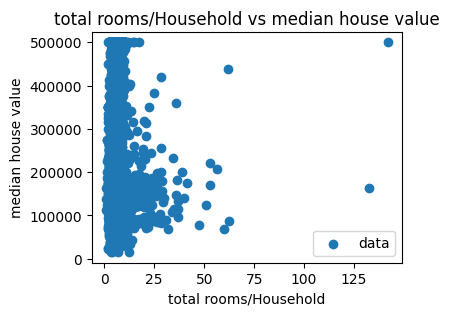

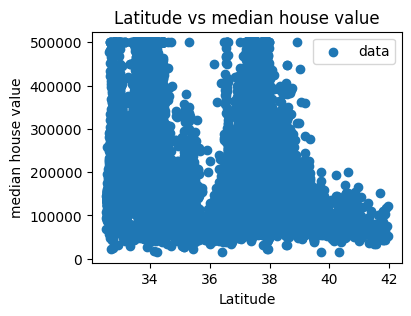

In [45]:
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(data_housing['MedianIncome'], data_housing['MedianHouseValue'], label='data')
ax.set_title('Median Income vs median house value')
ax.set_xlabel('Median Income')
ax.set_ylabel('Smedian house value')
ax.legend()
fig.show()
# Median Income vs median house value

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(data_housing['TotalRooms']/data_housing['Households'], data_housing['MedianHouseValue'], label='data')
ax.set_title('total rooms/Household vs median house value')
ax.set_xlabel('total rooms/Household')
ax.set_ylabel('median house value')
ax.legend()
fig.show()
# total rooms/Household vs median house value

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(data_housing['Latitude'], data_housing['MedianHouseValue'], label='data')
ax.set_title('Latitude vs median house value')
ax.set_xlabel('Latitude')
ax.set_ylabel('median house value')
ax.legend()
fig.show()
# Latitude vs median house value

### There is a slight correlation between income and median house value, which makes sense that the more you earn, the more expensive you would spend on housing. However, there is also exception that people with 0 income also live in 500000 value houses. Heredity is my best guess.
### For total number of rooms, there is no particular relationship between the number and the value of house.
### As for latitude, there are two peaks at 34 and 38. I am assuming the valley latitude area might be in mountains or somewhere not ideal for human activities.

#Part 2: data standardization

##1
###import the usual modules for loading csv data, manipulating it, and plotting it

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##2
###read the 'preprocessing_sample_data_onehot.csv' file into a pandas DataFrame, and print out the column (feature) names and a few rows. Note that the first column of the data file is the row index, so you'll need to pass the optional index_col argument.


In [47]:
dlin = pd.read_csv('/content/drive/MyDrive/machinelearning_dataset/preprocessing_sample_data_onehot.csv', index_col=0)
#index_col=0: use the first line for header

print(dlin.columns)
print(dlin.head())
print(len(dlin))

Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')
   weight_kg  overall_length_mm  avg_rating  variety_0  variety_1  variety_2
0   0.003776         199.132337  285.580952          0          0          1
1   0.008966         193.617089  303.793877          0          0          1
2   0.003654         109.604169  364.958930          1          0          0
3   0.009349         249.698449  361.290959          0          0          1
4   0.005907         125.443557  231.345769          0          1          0
300


##3
###Use train_test_split to split the data into 75% training and 25% testing data, splitting all the columns in the data frame in one call. Be sure to set the np.random.seed(5) in the same cell but before the call to train_test_split so the results of the split are reproducible with what I expect.


In [48]:
np.random.seed(5)

from sklearn.model_selection import train_test_split

all_data = dlin.iloc[0:300]
print('all_data shape', all_data.shape)

dlin_fit, dlin_test = train_test_split(all_data, test_size = 0.25)
print("dlin_fit type", type(dlin_fit))
print("fit data shape", dlin_fit.shape, "test", dlin_test.shape)


all_data shape (300, 6)
dlin_fit type <class 'pandas.core.frame.DataFrame'>
fit data shape (225, 6) test (75, 6)


##4
###Fit the 'avg_rating' column as the target with the remaining columns as the features.  You can use the DataFrame.drop() method to create the table containing just the features, but since you want to drop columns (specifically the 'avg_rating' column) be sure to check out the axis optional argument. For your own sake (no need to leave in the final submitted notebook), print the head of the resulting DataFrame to make sure you kept the intended (feature) columns.  Fit two different models - one LinearRegression, and one Ridge with α=0.01.


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


fit_x = dlin_fit.drop('avg_rating', axis=1)
fit_y = dlin_fit['avg_rating']

test_x = dlin_test.drop('avg_rating', axis=1)
test_y = dlin_test['avg_rating']
#define target and features

# fit_x, test_x, fit_y, test_y = train_test_split(dlin[['weight_kg', 'overall_length_mm', 'variety_0', 'variety_1', 'variety_2']], dlin['avg_rating'], test_size=0.25)
# #is this step necessary?

m = LinearRegression()
m.fit(fit_x, fit_y)
#define linear regression model on fitting data

Ridge_model = Ridge(0.01)
Ridge_model.fit(fit_x, fit_y)
# define ridge on fitting data



Ridge(alpha=0.01)

##5
###Do a scatterplot of the actual testing avg_rating target on one axis and the prediction of each model on the corresponding feature values on the other axis.  Plot results for both models on the same panel. Be sure to give marker sizes (s=integer optional argument), and make the marker size on the first one larger, so you can see both if the points overlap. Create a text box and explain what this plot would look like for a perfect fit.  Discuss the differences you see between the two models.  Do they both seem to be behaving sensibly?


fit linreg score 0.9299773285877417
test linreg score 0.9100832065669706
fit ridge score 0.7288847483823705
test ridge score 0.6498012509681663


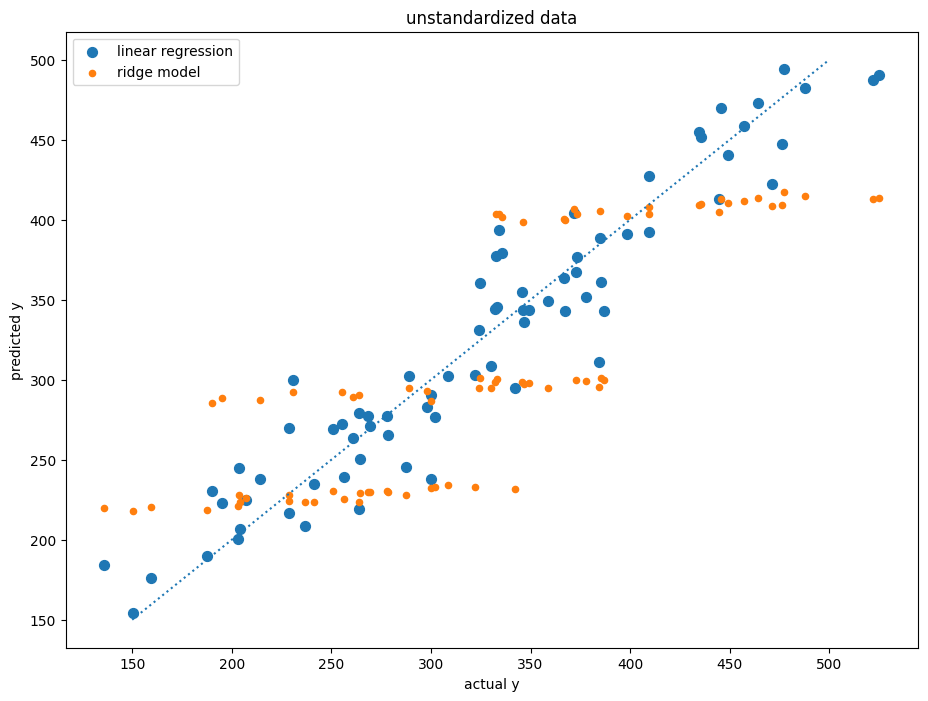

In [50]:
figsize = (11, 8)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_y, m.predict(test_x), label='linear regression', s=50, c='C0')
#linear regression scatter

ax.scatter(test_y, Ridge_model.predict(test_x), label='ridge model', s=20, c='C1')
#ridge scatter

ax.set_xlabel('actual y')
ax.set_ylabel('predicted y')
plt.title('unstandardized data')
ax.plot([150,500],[150,500], ':')
ax.legend()
fig.show()

print('fit linreg score', m.score(fit_x, fit_y))
print('test linreg score', m.score(test_x, test_y))
# score of linreg testing

print('fit ridge score', Ridge_model.score(fit_x, fit_y))
print('test ridge score', Ridge_model.score(test_x, test_y))
# score of ridge testing


### This plot is not a perfect fit. In order to be a perfect fit, every dot should be sitting on the dashline that is across the graph, which indicates actual y=predicted y. Neither model aligns with it. Other than that, the ridge scores are low, and the two scores do not match each other. This implies the ridge model is overfit. But the scores of linreg fitting & testing is high, which means the linreg model is a good fit.
### For linear regression model, it looks sensible because it follows the trend of the dashline; however, the ridge model does not look sensible. the scatters are too horizontal to each other considering the ridge alpha is small.

##6
###Create an sklearn pipeline that applies the StandardScaler transformation before doing the LinearRegression or Ridge fit (you'll need to make two, one for each fitting method). Fit each one to the same fitting data.


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pp_linreg = make_pipeline(StandardScaler(), LinearRegression())
pp_linreg.fit(fit_x, fit_y)
#pipeline applies standardscaler transformation before doing linreg


pp_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.01))
pp_ridge.fit(fit_x, fit_y)
#pipeline applies standardscaler transformation before doing ridge

print('test linreg score', pp_linreg.score(test_x, test_y))
print('test ridge score', pp_ridge.score(test_x, test_y))
# pipeline score



test linreg score 0.9100832065669449
test ridge score 0.9100815871076595


##7
###Do the same scatterplots (in 1 panel) as in step 5 but for the pipelined models. Create a text box and discuss the differences between the two models, and how they compare to the models without the data standardization.


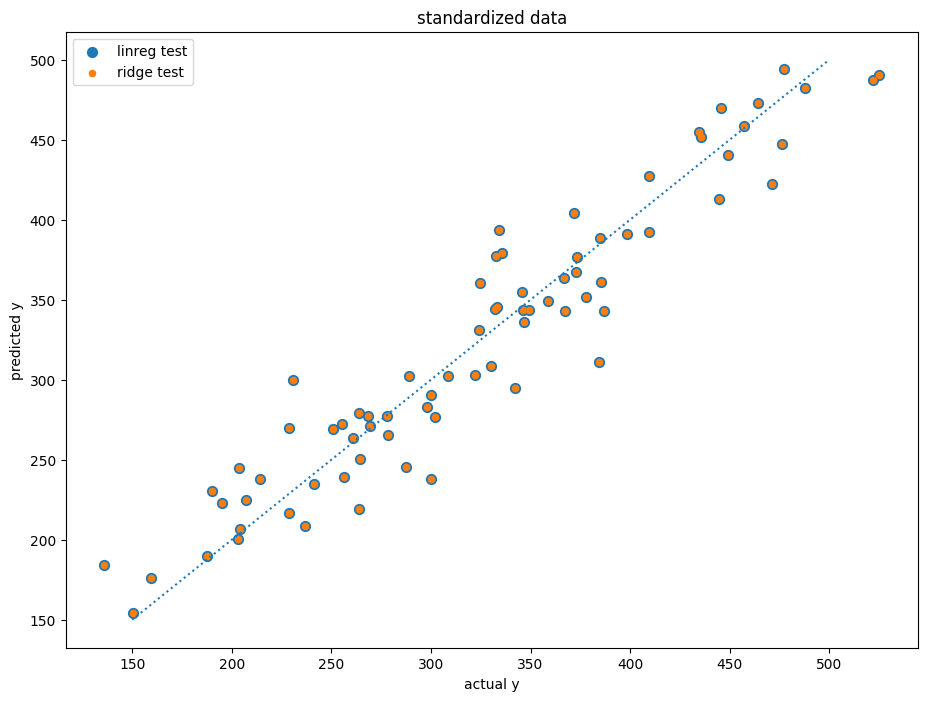

In [52]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_y, pp_linreg.predict(test_x), label='linreg test', s=50, c="C0")
ax.scatter(test_y, pp_ridge.predict(test_x), label='ridge test', s=20, c="C1")
ax.set_xlabel('actual y')
ax.set_ylabel('predicted y')
ax.plot([150,500],[150,500], ':')
ax.set_title('standardized data')
ax.legend()
plt.show()


### After standardization, the two models look the same. The reason for that should be because they derive from the same dataset. When data standardization modifies the coordinates, both models with the same dataset change with it.
### If we look closely, the data points also align with the linreg model in Q5 perfectly. Thus, we can conclude that the linreg model before standaridazion is already at its best "standardized behavior".
### ridge model data points on the other hand, got "corrected" after data standardization. They are more centeralized compare to the data points without standardization.